# Проект: Исследовательский анализ данных

В моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

## Оглавление<a name="Head"></a> 
## [Шаг 1: Общая информация](#1)
## [Шаг 2: Предобработка данных](#2)
### [Потолки, этажность, апартаменты, студии, балконы.](#21)
### [Пос**ё**лки](#22)
### [Заполнение NaN и обработка аномальных значений площадей.](#23)
### [Выгрузка прервалась](#24)
### [Типы данных](#25)
### [Итоги предобработки данных:](#26)
## [Шаг 3. Добавление в таблицу новых столбцов со следующими параметрами:](#3)
## [Шаг 4. Исследовательский анализ данных:](#4)
### [1. Расчет площадей](#4)
#### [Общая площадь:](#4)
#### [Жилая площадь:](#412)
#### [Площадь кухни:](#413)
#### [Цена объекта:](#414)
#### [Количество комнат:](#415)
#### [Высота потолков:](#416)
#### [Этаж квартиры:](#417)
#### [Тип этажа квартиры:](#418)
#### [Общее количество этажей в доме:](#419)
#### [Расстояние до центра города в метрах:](#4110)
#### [Расстояние до ближайшего аэропорта:](#4111)
#### [Расстояние до ближайшего парка:](#4112)
#### [День и месяц публикации объявления:](#4113)
### [2. Скорость продажи квартир](#42)
### [3. Факторы влияющие на общую (полную) стоимость объекта](#43)
#### [Общая площадь:](#43)
#### [Жилая площадь и площадь кухни:](#432)
#### [Количество комнат:](#433)
#### [Этаж, на котором расположена квартира (первый, последний, другой):](#434)
#### [Дата размещения (день недели, месяц, год):](#435)
### [4. Цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.](#44)
### [5. Cредняя цена каждого километра в сторону центра.](#45)
## [Шаг 5: Заключение](#5)

## [Шаг 1: Общая информация](#Head)<a name="1"></a> 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import math
try:
    data = pd.read_csv('/Users/evgeniu/Desktop/Education/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



<table>
    <caption>Описание данных</caption>
    <tr>
        <td>airports_nearest</td> <td>расстояние до ближайшего аэропорта в метрах (м)</td>
    </tr>
    <tr>
        <td>balcony</td> <td>число балконов</td>
    </tr>
    <tr>
        <td>ceiling_height</td><td>высота потолков (м)</td>
    </tr>
    <tr>
        <td>cityCenters_nearest</td><td>расстояние до центра города (м)</td>
    </tr>
    <tr>
        <td>days_exposition</td><td>сколько дней было размещено объявление (от публикации до снятия)</td>
    </tr>
    <tr>
        <td>first_day_exposition</td><td>дата публикации</td>
    </tr>
    <tr>
        <td>floor</td><td>этаж</td>
    </tr>
    <tr>
        <td>floors_total</td><td>всего этажей в доме</td>
    </tr>
    <tr>
        <td>is_apartment</td><td>апартаменты (булев тип)</td>
    </tr>
    <tr>
        <td>last_price</td><td>цена на момент снятия с публикации</td>
    </tr>
    <tr>
        <td>living_area</td><td>жилая площадь в квадратных метрах (м²)</td>
    </tr>
    <tr>
        <td>locality_name</td><td>название населённого пункта</td>
    </tr>
    <tr>
        <td>open_plan</td><td>свободная планировка (булев тип)</td>
    </tr>
    <tr>
        <td>parks_around3000</td><td>число парков в радиусе 3 км</td>
    </tr>
    <tr>
        <td>parks_nearest</td><td>расстояние до ближайшего парка (м)</td>
    </tr>
     <tr>
        <td>ponds_around3000</td><td>число водоёмов в радиусе 3 км</td>
    </tr>
     <tr>
        <td>ponds_nearest</td><td>расстояние до ближайшего водоёма (м)</td>
    </tr>
     <tr>
        <td>rooms</td><td>число комнат</td>
    </tr>
     <tr>
        <td>studio</td><td>квартира-студия (булев тип)</td>
    </tr>
     <tr>
        <td>total_area</td><td>общая площадь квартиры в квадратных метрах (м²)</td>
    </tr>
     <tr>
        <td>total_images</td><td>число фотографий квартиры в объявлении</td>
    </tr>
</table>

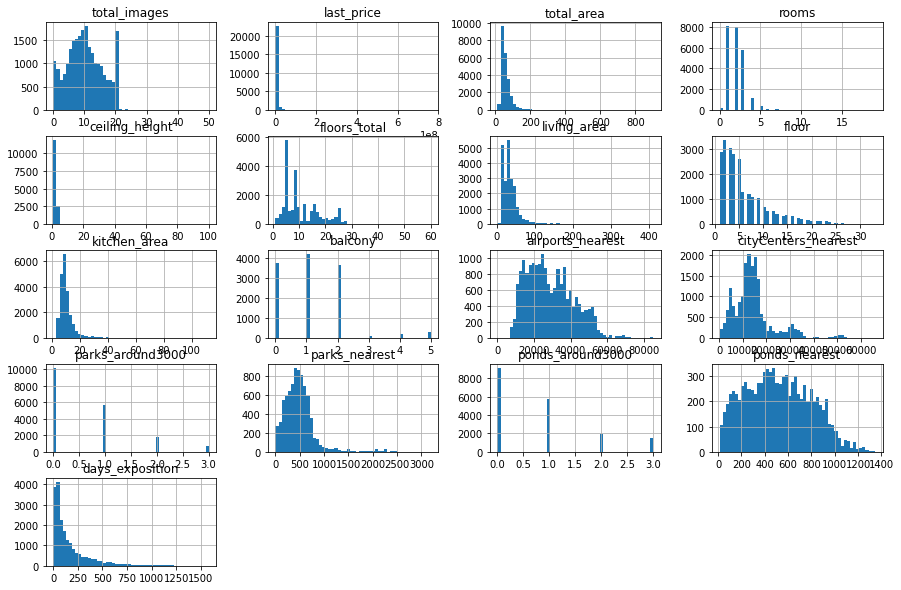

In [3]:
data.hist(figsize=(15, 10), bins=50)
plt.rcParams['font.size'] = 7
plt.show()

## [Шаг 2: Предобработка данных](#Head) <a name="2"></a> 

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датасете есть 14 сотлбцов с пропусками. Проверим каждый из них и попробуем заполнить:

In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


### [Потолки, этажность, апартаменты, студии, балконы.](#Head)<a name="21"></a> 

In [6]:
#NaN высоты потолков заполяю медианными значениями. Пропусков много, эти записи лучше не терять.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].median()

2.65

In [7]:
data['ceiling_height'].sort_values().unique() #Есть неадекватная высота потолка(1, 100, 1.2), есть значения 20-32, где, вероятно, не поставили разделитель при указании высоты.

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [8]:

data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height']/10 #Делим ошибочные значения
data = data[~((data['ceiling_height'] > 6) | (data['ceiling_height'] < 1.7))] #Отбрасываем невнятные данные

In [9]:
for floor in data['floor'].unique():
    data.loc[(data['floor'] == floor) & (data['floors_total'].isna()), 'floors_total'] = \
        round(data.loc[(data['floor'] == floor), 'floors_total'].mean())
#Подставляем к каждому пропущенному значению этажности среденее значение количества этажей дома, этажу корого соответствует продаваемая квартира.
display(data['floor'].min(), data['floors_total'].min())

1

1.0

In [10]:
#Если для апртаментов не указано значение, то ему стоит присвоить значение False. 
data['is_apartment'] = data['is_apartment'].fillna(False)
#Для объявлений с NaN балконов стоит поставить значение 0. При создании объявления наиболее вероятно, что это значение не установили в 0.
data['balcony'] = data['balcony'].fillna(0)

In [11]:
display(data[data['rooms'] == 0]['rooms'].count())
data[data['studio']]['rooms'].value_counts()

197

0    138
1     11
Name: rooms, dtype: int64

In [12]:
#квартиры без комнат - студии. Заполним:
data.loc[data['rooms'] == 0, 'studio'] = True

### [Пос**ё**лки](#Head)<a name="22"></a> 

In [13]:
#Проверка locality_name
len(data[data['locality_name'].isna()])
# Пропущено 49 значений с названием города, это не частные дома, здания многоэтажные. 
# На многих записях указано расстояние до аэропорта и центра.
# Данных немного, определим эти квартиры в населенный пункт 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

In [14]:
#Унифицируем префиксы для поселений
village = {'посёлок' : ['посёлок городского типа', 'поселок городского типа', 'пгт', 'городской посёлок',  
                        'городской поселок', 'коттеджный посёлок', 'коттеджный поселок', 'посёлок станции', 
                        'поселок станции', 'посёлок при железнодорожной станции', 'поселок', 'село',], 
           'снт' : ['садовое товарищество', 'садоводческое некоммерческое товарищество'],
           'деревня' : ['деревня']}
#Достанем записи с Названиями городов-саттелитов
cities = []
for city in data['locality_name'].unique():
    if city.istitle():
        cities.append(city)
print(cities)

['Санкт-Петербург', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Коммунар', 'Колпино', 'Гатчина', 'Выборг', 'Кронштадт', 'Кировск', 'Павловск', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Красное Село', 'Сясьстрой', 'Сланцы', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кудрово', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Тихвин', 'Тосно', 'Бокситогорск', 'Пикалёво', 'Подпорожье', 'Приморск', 'Новая Ладога', 'Лодейное Поле', 'Светогорск', 'Любань', 'Каменногорск', 'Высоцк']


In [15]:
def fix_village(village_name):
    for city in cities:
        if city in village_name:
            return city #Вернем город
        
    for val, key in zip(village.values(), village.keys()):
        for item in val:
            if item in village_name:
                return village_name.replace(item, key)
    return village_name #Или унифицируем приставку по словарю
 

In [16]:
data['locality_name'] = data['locality_name'].apply(fix_village)


In [17]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
      

В списке была большая вариативность указаний населнного пункта. Был создан словарь по которому приставки унифицируются, пустые записи называются 'unknown'. Для более качествнного хранения информации стоит использовать строгий формат записи.

In [18]:
#Не забываем проверять себя
#Код ревьюера
len(data.locality_name.unique())

310


### [Заполнение NaN и обработка аномальных значений площадей.](#Head)<a name="23"></a> 

In [19]:

print('Ошибки исходных данных(площадь < кухня + жилая):', len(data.query('total_area < (kitchen_area + living_area)')),\
        '\nКоличество строк с пустой площадью кухни или жилой:', len(data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]))

Ошибки исходных данных(площадь < кухня + жилая): 64 
Количество строк с пустой площадью кухни или жилой: 2715


In [20]:

def fill_area(row):
    if math.isnan(row['living_area']):
        row['living_area'] = find_neighbor(row['total_area'], 'living_area')
    if math.isnan(row['kitchen_area']):
        row['kitchen_area'] = find_neighbor(row['total_area'], 'kitchen_area')
    return row
#алгоритм нахождения ближайших записей по значению
def find_neighbor(value, target_column):
    stack = []
    expander = 0.1
    while len(stack)<20:
        stack = data[(data['total_area'] < value + expander)][target_column] #Расширяю поиск только на меньшие площади, что бы не породить ошибки
        expander += 0.2
    return stack.median() #Код говно, пока можно заварить чаю

In [21]:
data = data.apply(fill_area, axis = 1)

In [22]:
print('Ошибки исходных данных(площадь < кухня + жилая):', len(data.query('total_area < (kitchen_area + living_area)')),\
        '\nКоличество строк с пустой площадью кухни или жилой:', len(data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]),\
        '\nSmall kitchen:', data['kitchen_area'].min(), '\nSmall living:', data['living_area'].min(), '\nSmall area:', data['total_area'].min())

Ошибки исходных данных(площадь < кухня + жилая): 111 
Количество строк с пустой площадью кухни или жилой: 0 
Small kitchen: 1.3 
Small living: 2.0 
Small area: 12.0


In [23]:
error = data.loc[(data['total_area']) < (data['kitchen_area'] + data['living_area'])][['total_area', 'kitchen_area', 'living_area']]
error['error_delta'] = error['kitchen_area'] + error['living_area'] - error['total_area']

#Ниже расчет доли площади, которая не является жилой и кухней.
no_life_area_koef = (abs((data['kitchen_area'] + data['living_area'] - data['total_area'])) / data['total_area']).median()
#1/4 площади в квартирах не относится к жилой или кухне. ее доля должна быть в значениях с ошибкой
no_life_area_koef = 2 - 2 * no_life_area_koef 
# значение для того что бы отнять пропорционально площади от жилой площади и кухни. Магия да и только!

error['kitchen_area'] = error['kitchen_area'] - (error['error_delta'] / no_life_area_koef)
error['living_area'] = error['living_area'] - (error['error_delta'] / no_life_area_koef)

data.update(error)
print('количество ошибок:', len(data.query('total_area < (kitchen_area + living_area)')))

количество ошибок: 0


Пропущенные значения вызваны пропусками при заполнении карточки объявления. Ошибки по площадям были допущены при заполнении данных. Вобщем человеческий фактор.



### [Выгрузка прервалась](#Head)<a name="24"></a> 
ponds_around3000, airports_nearest, cityCenters_nearest, parks_around3000 имеют схожее количество пропусков. Возможно в этом есть какая-то связь

In [24]:
data.query('airports_nearest.isna() and cityCenters_nearest.isna() and ponds_around3000.isna() and parks_around3000.isna()').isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5516
cityCenters_nearest     5516
parks_around3000        5516
parks_nearest           5516
ponds_around3000        5516
ponds_nearest           5516
days_exposition          865
dtype: int64

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest имеют пустые значения.
Похоже проблема вызвана ошибкой при выгрузке данных. Это важное замечание. Возможно эта часть датасета не сможет учавствовать в некоторых исследованиях. 

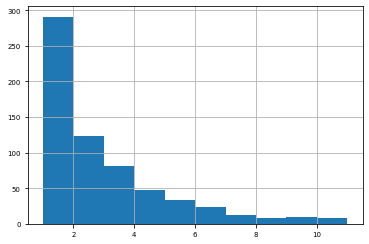

In [25]:
data[data['days_exposition'].isna()]['first_day_exposition'].value_counts().hist(bins=10, range=(1,11));
#Похоже пустые данные в days_exposition означают что объявление было еще активно на момент выгрузки. Нет даты закрытия - NaN. Заменим на -1

In [26]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5540
cityCenters_nearest      5517
parks_around3000         5516
parks_nearest           15615
ponds_around3000         5516
ponds_nearest           14584
days_exposition             0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23690 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23690 non-null  int64  
 1   last_price            23690 non-null  float64
 2   total_area            23690 non-null  float64
 3   first_day_exposition  23690 non-null  object 
 4   rooms                 23690 non-null  int64  
 5   ceiling_height        23690 non-null  float64
 6   floors_total          23690 non-null  float64
 7   living_area           23690 non-null  float64
 8   floor                 23690 non-null  int64  
 9   is_apartment          23690 non-null  bool   
 10  studio                23690 non-null  bool   
 11  open_plan             23690 non-null  bool   
 12  kitchen_area          23690 non-null  float64
 13  balcony               23690 non-null  float64
 14  locality_name         23690 non-null  object 
 15  airports_nearest   

### [Типы данных](#Head)<a name="25"></a> 

Для дальйшей работой с датасетом нужно преобразовать следующие столбцы:
* first_day_exposition - содерижт дату, надо привести в datetime для более удобного взаимодействия
* floors_total - к int 2,5 этажа в доме не видал.
* balcony - к int 
* days_exposition - к int - все что имеет целочисленный вид лучше подтянуть под int

In [29]:
try:
    data['floors_total'] = data['floors_total'].astype('int')
    data['balcony'] = data['balcony'].astype('int')
    data['days_exposition'] = data['days_exposition'].astype('int')
    data['first_day_exposition'] = pd.to_datetime( 
        data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S' #2015-08-20T00:00:00
    )
except:
    print('Ошибка преобразования')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,9.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [30]:
data.duplicated().sum() #Поиск явных дубликатов

0

### [Итоги предобработки данных:](#Head)<a name="26"></a> 
* Пропуски *ceiling_height, is_apartment, balcony, floors_total, studio* имели случайный характер, форма карточки объявления не требует наличие этих данных, люди указывали на свое усмотрение.  
* *is_apartment, balcony* - False по умолчанию
* *studio* - Дополнен значениями True для 0 комнат
* *ceiling_height* получил медиану всех значений. Аномалии были вызваны направильно внесенными данными. Было бы хорошо передать программистам добавить проверку высоты потолков в поле карточки.
* floors_total получил медианное значение по этажности домов этажа, который указан в объявлении.
* *kitchen_area, living_area* пустые ячейки получили медианные значения по выборке минимум из 20 значений набора, состоящего из ближайших по общей площади объявлений. Аномалией в данных являлся набор площадей, который в сумме превышал общую площадь квартиры. Ошибки были исправлены путем пропорционального уменьшения площадей до ~75% от общей площади. Данные так-же не обязательны к заполнению, и, возможно, стоило бы добавить проверку на верность вводимых данных.
* *days_exposition* был NaN на активных объявлениях, это технический пропуск. -1 стал для не закрытого объявления. Кажется так будет легче исключить данные, и будет видно если они случайно попадут в зависимую от этого столбца выборку.
* ~5500 строк не получили значений об окружении в датасете. Возможно это ошибка при выгрузке. Остальная чаcть значений не заполнена. Возможно по этим адресам неизвестна геолокация, или искомые парки или водоемы далеко. Для маленьких населенных пунктов эта информация тоже могла быть недоступна т.к не размечена карта.
* *locality_name* имел пропуски, деревня неизвестных адресов стала 'unknown'. Пропуска могут быть обусловлены отсутствием адреса в объявлении.

## [Шаг 3. Добавление в таблицу новых столбцов со следующими параметрами:](#Head)<a name="3"></a> 

цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [31]:
data['price_per_square'] = data['last_price'] / data['total_area']
data['day_first_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_first_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_first_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [32]:
def floor_classifier(row):
    if row['floors_total'] == row['floor']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

In [33]:
data['floor_type'] = data.apply(floor_classifier, axis=1)
data['cityCenters_km_nearest'] = round(data['cityCenters_nearest']/1000)

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_first_day_exposition,month_first_day_exposition,year_first_day_exposition,floor_type,cityCenters_km_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,-1,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.0


## [Шаг 4. Исследовательский анализ данных:](#Head)<a name="4"></a> 
### 1. Расчет площадей
#### Общая площадь:


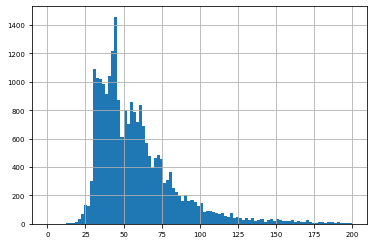

In [35]:
data['total_area'].hist(range = (0, 200), bins = 100);

36 однушка, 45 двушка, 60 трешка, 75 на 4 комнаты. 
На графике видны пучки у типового жилья.
#### [Жилая площадь:](#Head)<a name="412"></a> 

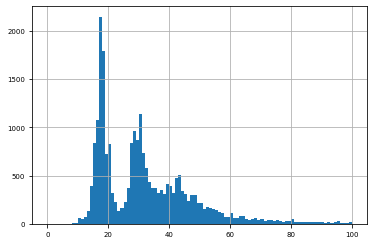

In [36]:
data['living_area'].hist(range = (0, 100), bins = 100, legend = None);

Тут тоже имеются пучки идущие за количеством комнат. 17 жилых квадратов хотят продать больше всего.
#### [Площадь кухни:](#Head)<a name="413"></a> 

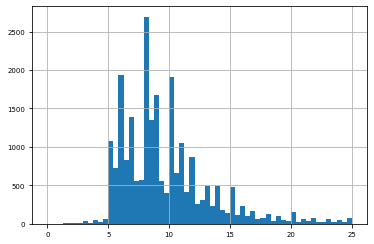

In [37]:
data['kitchen_area'].hist(range = (0, 25), bins = 60, legend = None);

Видны типовые решения по размерам кухонь.
#### [Цена объекта:](#Head)<a name="414"></a> 

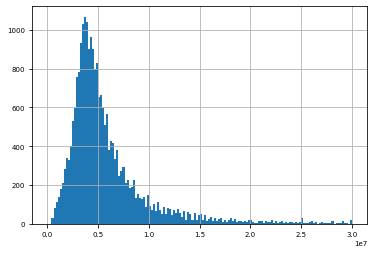

In [38]:
data['last_price'].hist(range = (0, 30000000), bins = 150);

График распределения цены. Типовая недвижимость в Ленинградской области ~4млн. 
Видно как продавцы любят округлять ценники
#### [Количество комнат:](#Head)<a name="415"></a> 

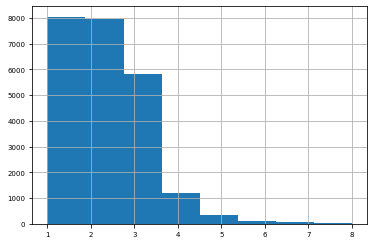

In [39]:
data['rooms'].hist(bins = 8, range = (1,8));

Количство однушек и двушек в продаже равно! А уже 4 комнаты можно встретить сильно реже чем 3
#### [Высота потолков:](#Head)<a name="416"></a> 

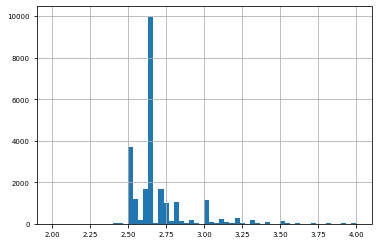

In [40]:
data['ceiling_height'].hist(range=(2,4), bins = 60);

Здесь получилось увидеть ~9к записей NaN по высоте потолка в позиции 2.65. Если их отбросить то видим стандарный 2.5, 2.6, 2.7, 2.8, 3 
#### [Этаж квартиры:](#Head)<a name="417"></a> 

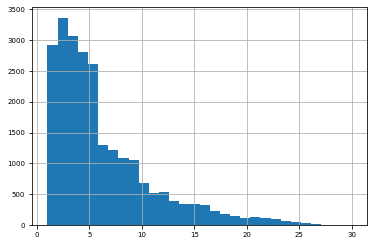

In [41]:
data['floor'].hist(bins = 30, range = (1, 30));

Половина объма объявлений ниже 6-го этажа. Хороший вид где-то на 25.
#### [Тип этажа квартиры:](#Head)<a name="418"></a> 

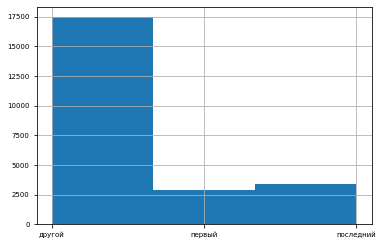

In [42]:
data['floor_type'].hist(bins = 3);

Квартир последних этажей больше чем первых в продаже. Объем первых и последних 2/9 от прочих.
#### [Общее количество этажей в доме:](#Head)<a name="419"></a> 

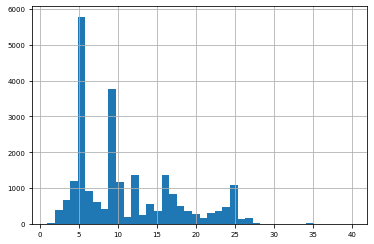

In [43]:
data['floors_total'].hist(bins = 40, range = (1, 40));

Сталинки, хрущевки. Все видно здесь. 5 и 9 этажные дома составляют почти половину рынка недвижимости.
#### [Расстояние до центра города в метрах:](#Head)<a name="4110"></a> 

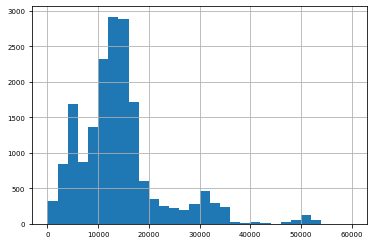

In [44]:
data['cityCenters_nearest'].hist(bins = 30, range = (0, 60000));

10км до центра. Это, оказывается, норма. Количество продаваемого жилья растет с удалением от центра, до границ города. Дальше видны только города-саттелиты.
#### [Расстояние до ближайшего аэропорта:](#Head)<a name="4111"></a> 

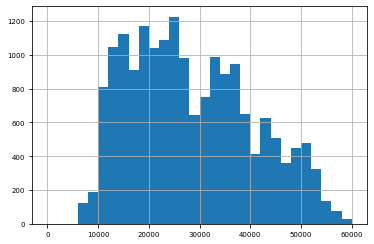

In [45]:
data['airports_nearest'].hist(bins = 30, range = (0, 60000));

Ни одного дома в радиусе 5-км от аэропорта. По гистограмме видно, что аэропорт примерно в ~15 км удален от центра города по равномерной плотности 10-40км
#### [Расстояние до ближайшего парка:](#Head)<a name="4112"></a> 

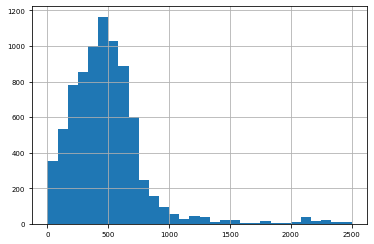

In [46]:
data['parks_nearest'].hist(bins = 30, range = (0,2500));

Парк у дома - это хорошо. Выходит, что парки обычно расположены в 1,5 км друг от друга

#### [День и месяц публикации объявления:](#Head)<a name="4113"></a> 

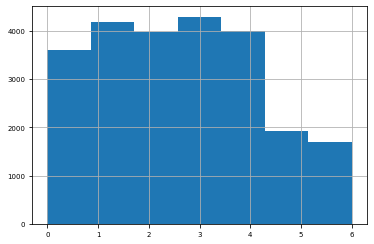

In [47]:
data['day_first_day_exposition'].hist(bins = 7);

Понедельник - день тяжелый,
среда - маленькая пятница,
пятница - подготовка к выходным. 
Такой график у риелторов в том числе.

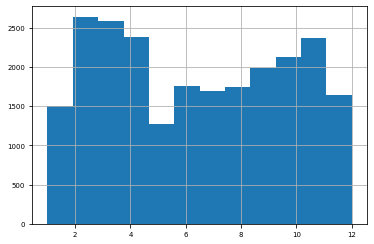

In [48]:
data['month_first_day_exposition'].hist(bins = 12);

Летом и зимой активность ниже, весна - лучший период искать предложения.

### [2. Скорость продажи квартир](#Head)<a name="42"></a> 

Cреднее значение времени продажи: 156 
Медианное время продажи: 74


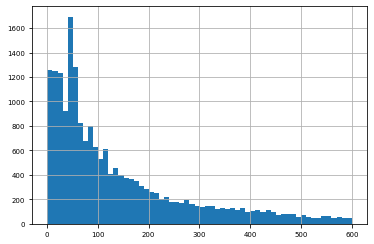

In [49]:
print('Cреднее значение времени продажи:', round(data['days_exposition'].mean()), '\nМедианное время продажи:', round(data['days_exposition'].median()))
data['days_exposition'].hist(bins = 60, range = (1,600));

In [50]:
data['days_exposition'].value_counts().head(10)

-1     3181
 45     880
 60     538
 7      234
 30     208
 90     204
 4      176
 3      158
 5      152
 14     147
Name: days_exposition, dtype: int64

In [51]:
data[data['days_exposition'] != -1]['days_exposition'].describe()

count    20509.000000
mean       180.879614
std        219.745266
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Удивительно, распределение имеет аномальные данные. Высокие значения относятся к круглым датам. Возможно что объявления иногда висят активным до закрытия его платформой.
Особо долгие (даже 5 лет!) объявление уводят среднее время до 180 дней. Хотя медиана в 2 раза меньше, всего 95 дней.
Границу первого квартиля можно принять как быструю продажу: продать квартиру за полтора месяца значит быстро. 
8 месяцев на доске объявлений - это 3-й квартиль. Значения выше буду считаться как долгое время продажи.

### [3. Факторы влияющие на общую (полную) стоимость объекта](#Head)<a name="43"></a> 
#### Общая площадь:

Коэффициент корелляции: 0.65


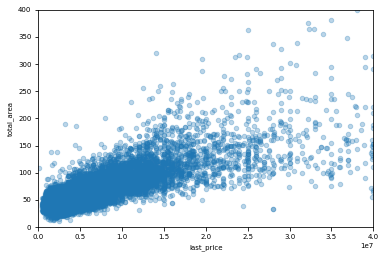

In [52]:
print('Коэффициент корелляции:', round(data['last_price'].corr(data['total_area']), 2))
data.plot(x = 'last_price', xlim = (0, 40000000), 
          y = 'total_area', ylim = (0, 400), 
          kind='scatter', alpha = 0.3,
          legend=None);

Зависимость цены от площади достаточно высока, и является определяющей в цене жилья.
#### [Жилая площадь и площадь кухни:](#Head)<a name="432"></a>

Коэффициент корелляции: 0.54


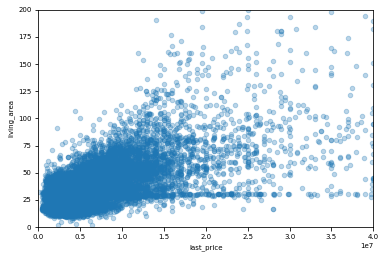

In [53]:
print('Коэффициент корелляции:', round(data['last_price'].corr(data['living_area']), 2))
data.plot(x = 'last_price', xlim = (0, 40000000), 
          y = 'living_area', ylim = (0, 200), 
          kind='scatter', alpha = 0.3);

Коэффициент корелляции: 0.44


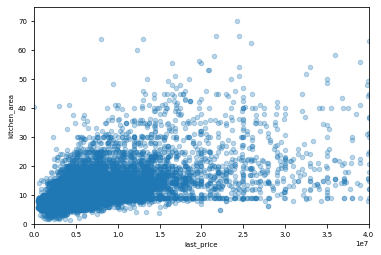

In [54]:
#Сводная таблица цена кухня площадь 
print('Коэффициент корелляции:', round(data['last_price'].corr(data['kitchen_area']), 2))
data.plot(x = 'last_price', xlim = (0, 40000000), 
          y = 'kitchen_area', ylim = (0, 75), 
          kind='scatter', alpha = 0.3);
#скаттер

Зависимость цены от жилой площади и площади кухни меньше чем от общей. На графике просматривается линия на уровне 35м и 10м для кухни, которая никак не коррелирует. Похоже там сосредоточены другие определяющие факторы цены.
#### [Количество комнат:](#Head)<a name="433"></a>

In [55]:
data['rooms'].value_counts()

1     8043
2     7936
3     5813
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [56]:
#На 7+ комнат выборка будет очень мала, что может сильно исказить данные. Для анализа возьмем первые 6, включая студии.
room_relation = data[data['rooms'] < 6]
room_relation = room_relation.pivot_table(index='rooms', values=['last_price', 'price_per_square'], aggfunc='median')
room_relation['last_price'] = round(room_relation['last_price'] / 1000000, 2)
room_relation['price_per_square'] = round(room_relation['price_per_square'] / 1000, 2)

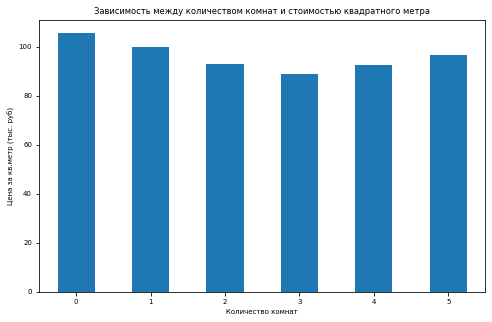

In [57]:
room_relation.plot.bar(y='price_per_square', figsize = (8,5), 
                    title = 'Зависимость между количеством комнат и стоимостью квадратного метра', rot = 0,
                   xlabel = "Количество комнат",
                   ylabel = "Цена за кв.метр (тыс. руб)",
                   legend = None);

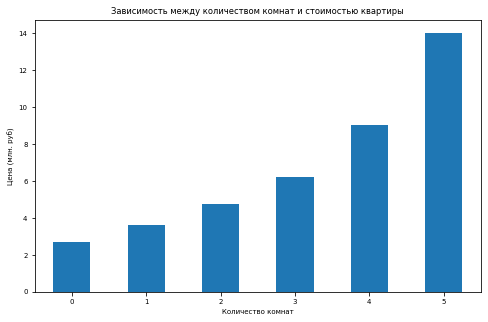

In [58]:
room_relation.plot.bar(y='last_price', figsize = (8,5), 
                    title = 'Зависимость между количеством комнат и стоимостью квартиры', rot = 0,
                   xlabel = "Количество комнат",
                   ylabel = "Цена (млн. руб)",
                   legend = None);

Самыми доступными по цене будут студии, но в студии самая большая цена за квадрат. А цена за комнату растет по экспоненте.
#### [Этаж, на котором расположена квартира (первый, последний, другой):](#Head)<a name="434"></a>

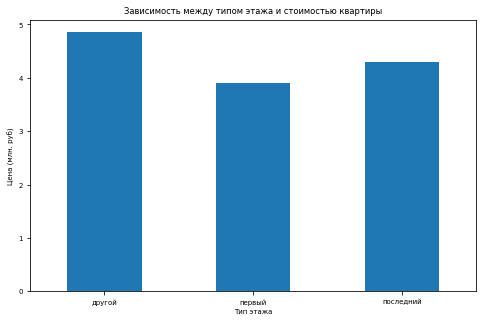

In [59]:
#Сводная таблица цена за этаж (группировка по этажу первый последний другой),
floor_type_relation = data.pivot_table(index='floor_type', values=['last_price'], aggfunc='median')
floor_type_relation['last_price'] = round(floor_type_relation['last_price'] / 1000000, 2)
floor_type_relation.plot.bar(y='last_price', figsize = (8,5), 
                    title = 'Зависимость между типом этажа и стоимостью квартиры', rot = 0,
                   xlabel = "Тип этажа",
                   ylabel = "Цена (млн. руб)",
                   legend = None);

На первом проходняк, на последнем крыша течет и лифт гудит. А между будет подороже.
#### [Дата размещения (день недели, месяц, год):](#Head)<a name="435"></a>

In [60]:
#Сводная таблица цена группировка по 
day_relation = data.pivot_table(index='day_first_day_exposition', values=['last_price'], aggfunc='median')
day_relation['last_price'] = round(day_relation['last_price'] / 1000000, 3)
day_relation['name_day'] = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресение']
month_relation = data.pivot_table(index='month_first_day_exposition', values=['last_price'], aggfunc='median')
month_relation['last_price'] = round(month_relation['last_price'] / 1000000, 3)
year_relation = data.pivot_table(index='year_first_day_exposition', values=['last_price'], aggfunc=['median', 'count'])
year_relation.columns = ['median', 'count']
year_relation['median'] = round(year_relation['median'] / 1000000, 3)
year_relation #в 2014 выборка маленькая. Данные могут быть искажены

,median,count
year_first_day_exposition,,
2014,7.70,137
2015,5.35,1190
2016,4.55,2782
2017,4.50,8188
2018,4.55,8514
2019,5.05,2879


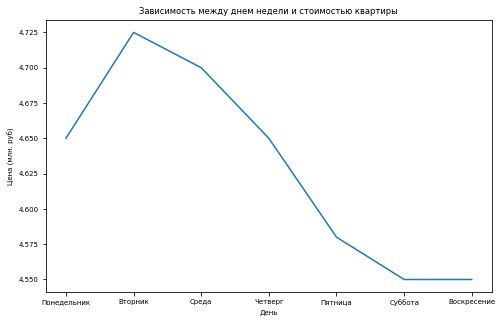

In [61]:
day_plot = day_relation.plot(y='last_price', figsize = (8,5), 
                    title = 'Зависимость между днем недели и стоимостью квартиры', rot = 0,
                   xlabel = "День",
                   xticks = day_relation.index,
                   ylabel = "Цена (млн. руб)", 
                   legend = None);
day_plot.set_xticklabels(day_relation.name_day);

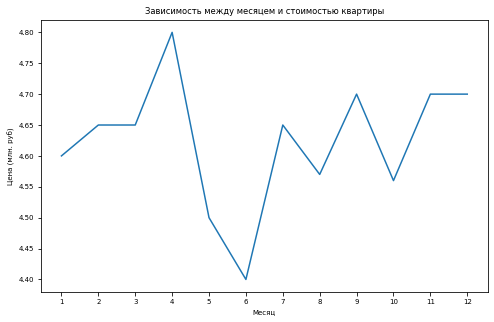

In [62]:
month_relation.plot(y='last_price', figsize = (8,5), 
                    title = 'Зависимость между месяцем и стоимостью квартиры', rot = 0,
                   xlabel = "Месяц",
                   xticks = month_relation.index,
                   ylabel = "Цена (млн. руб)", 
                   legend = None);

В апреле цены повыше, в июне - пониже. Разница ~10%. Возможно это случайный фактор. Но может быть цены снижают перед летом, что-бы ускорить продажи. Лето на рынке недвидимости может быть тихим сезоном, из-за снижения активности покупателей, сезона отпусков.

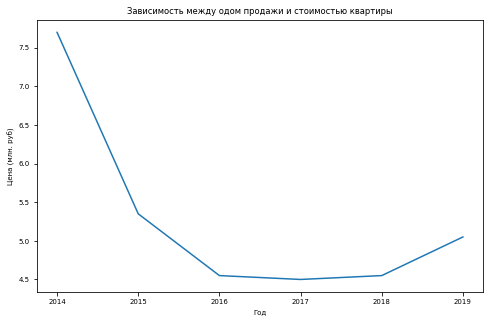

In [63]:
year_relation.plot(y='median', figsize = (8,5), 
                    title = 'Зависимость между одом продажи и стоимостью квартиры', rot = 0,
                   xlabel = "Год",
                   ylabel = "Цена (млн. руб)", 
                   legend = None);

На графике виден конец событий 2014 года, когда рубль немного закрепился. График скорее всего коррелирует с Российскими экономическими показателями.

### [4. Цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.](#Head)<a name="44"></a>

In [64]:
locality_pps = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['mean', 'count'])#.sort_values(by='price_per_square')
locality_pps.columns = ['mean_price', 'count']
locality_pps = locality_pps.sort_values(['count'], ascending=False).head(10)
locality_pps.sort_values(['mean_price'], ascending=False)

,mean_price,count
locality_name,,
Санкт-Петербург,114820.615344,15715
Пушкин,103125.819291,369
Кудрово,95324.930544,472
посёлок Парголово,90175.913458,327
Мурино,86087.512050,590
посёлок Шушары,78677.364217,440
Колпино,75424.579098,338
Гатчина,68746.146763,307
Всеволожск,68654.473986,398


В самые дорогие площади входят Санкт-Петербург и города-поселки агломерации. Самый дешевый оказался из выборки оказался Выброг. 58000 за м2 и не самая глушь. Киборг из песни знал куда ехать :).

### [5. Cредняя цена каждого километра в сторону центра.](#Head)<a name="45"></a>

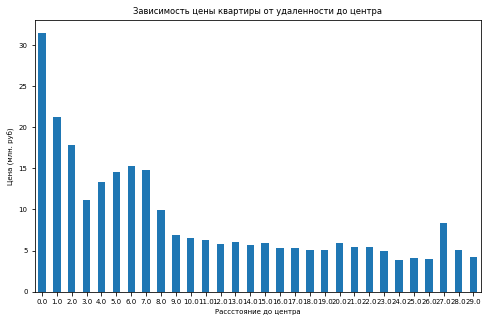

In [65]:
center_nearest_relation = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_km_nearest', values='last_price')
center_nearest_relation['last_price'] = round(center_nearest_relation['last_price'] / 1000000, 3)
center_nearest_relation.plot.bar(y='last_price', figsize = (8,5), 
                    title = 'Зависимость цены квартиры от удаленности до центра', rot = 0,
                   xlabel = "Рассстояние до центра",
                   ylabel = "Цена (млн. руб)", 
                   legend = None);

Одна квартира в центре или шесть в десяти км от центра. На графике видно что после удаления на 9-10 км от центра расстояние прктически перестает играть роль в ценообразовании. Чем ближе к центру, тем бильнее зависимость: квартира в самом центре на 30% дороже чем квартира в 1-2км!

## [Шаг 5: Заключение](#Head)<a name="5"></a>
Работу по исследованию данных можно считать завершенной. 
В ходе работы была выполнена предобработка данных:
* Были обнаружены ошибки и неполное заполнение карточек объявлений. Возможно стоит иметь словарь населнных пунктов, и сделать более строгую проверку поле ввода. Ошибки были исправлены, пропуски заполнены. 
* Часть информации была утерена при выгрузке таблицы. Некоторые исследования охватывали не полный объем данных.

Изученые параметры позволили сделать следующие выводы:
* На рынке недвижимости много однотипного жилья. 
* Основная масса предложениый 1,2-х комнатные квартиры.
* За исследуеммый период медианная квартира в ЛО стоила около 4-х млн руб.
* В выходные размещается в два раза меньше объявлений, чем днем.
* Весной размещается больше всего объявлений. 
* Медианное время продажи - 3 месяца. Быстрая продажа происходит за полтора месяца, долгая от 8мес.
* Корреляция цены от площади 0.65. 
* С ростом количества комнат цена растет, но метры в студиях дороже.
* Квартиры на крайних этажах продаются чуть дешевле прочих
* Искать квартиру лучше весной, а покупать в начале лета. По вторникам размещают более дорогие квартиры, чем в прочие дни.
* Жилье в центре сильно дороже. Расстояние до центра перестаёт влиять на цену с 10 километра. 
* В городах-поселках цены сильно ниже(1.5-4 раза) чем в Санкт-Петербурге, хоть они и находятся в одной области.

Из замечаний хочется отметить:
* Возможно высоту потолка имеет смысл хранить в картографической информации. В типовом доме потолки будут одинаковы в каждой квартире. 
* Ошибка в выгрузке данных может дать не полное представление об исследованиях, основанных на картографических показателях.
* В количестве дней размещения (days_exposition) имеются высокие значения на 30, 45, 60, 90 дней. Стоит уточнить природу их появлений.

